In [1]:
import numpy as np
import ruptures as rpt
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
rng = np.random.default_rng(0)
a = rng.normal(0.0, 0.4, 80)
b = rng.normal(3.0, 0.4, 70)
c = rng.normal(1.5, 0.4, 90)
x = np.concatenate([a, b, c]).astype(float)
x[60:65] = np.nan
x[120] = np.nan


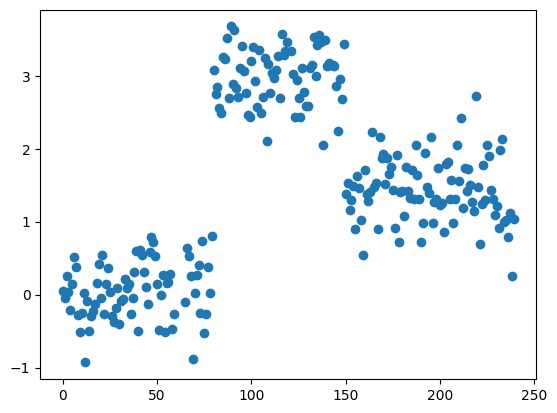

In [4]:
plt.scatter(range(len(x)), x)
plt.show()



In [5]:
x_in = pd.Series(x).interpolate("linear").bfill().ffill().to_numpy()


algo = rpt.Binseg(model="l2").fit(x_in)     
bkps = algo.predict(pen=10)                  
print("bkps with pen:", bkps)


bkps with pen: [80, 150, 240]


In [6]:

from sklearn.preprocessing import StandardScaler

rng = np.random.default_rng(7)
n = 300
t = np.arange(n)

X = np.zeros((n, 2))
X[:100, 0] = 0.02 * (t[:100] - 0) + rng.normal(0, 0.25, 100)
X[:100, 1] = -0.01 * (t[:100] - 0) + rng.normal(0, 0.25, 100)
X[100:200, 0] = 5 + rng.normal(0, 0.3, 100)
X[100:200, 1] = -2 + rng.normal(0, 0.3, 100)
X[200:, 0] = 2 + 0.6*np.sin(2*np.pi*(t[200:]-200)/40) + rng.normal(0, 0.25, 100)
X[200:, 1] = 3 + 0.4*np.cos(2*np.pi*(t[200:]-200)/50) + rng.normal(0, 0.25, 100)

X[140:161, :] = np.nan
X = pd.DataFrame(X).interpolate("linear").bfill().ffill().to_numpy()

X_std = StandardScaler().fit_transform(X)

algo = rpt.KernelCPD(kernel="rbf", jump=1).fit(X_std)
bkps = algo.predict(pen=10)        
print("bkps:", bkps)


bkps: [np.int32(100), np.int32(200), 300]


TypeError: 'NoneType' object is not iterable

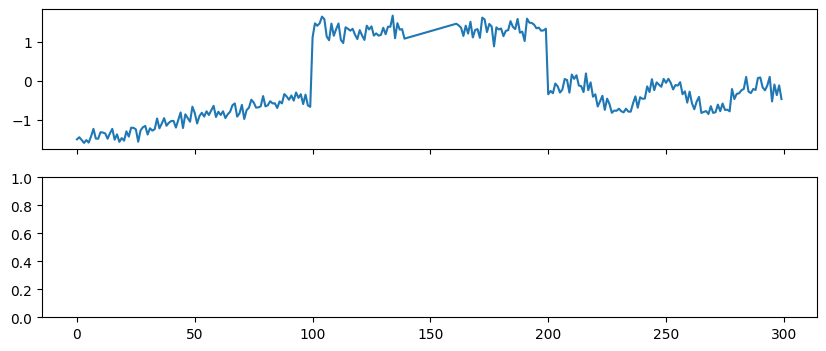

In [7]:
rpt.display(X_std, None, bkps)


## Real detect data 

In [9]:
bbox_centers = [
    [(73, 95), (73, 95), (73, 95), (73, 95), (74, 95), (74, 94), (74, 94), (74, 94), (74, 94), (74, 95), (74, 95), (74, 95), (74, 95), (75, 95), (75, 95), (75, 95), (75, 95), (75, 95), (75, 95), (75, 95), (75, 95), (75, 95), (75, 94), (74, 94), (74, 94), (75, 95), (75, 95), (75, 95), (75, 95), (75, 95), (75, 95), (74, 94), (74, 94), (75, 94), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (75, 96), (75, 96), (74, 96), (74, 96), (74, 96), (74, 96), (74, 95), (74, 95), (74, 95), (74, 96), (74, 96), (74, 96), (74, 96), (74, 96), (74, 95), (74, 95), (74, 95), (74, 95), (75, 95), (74, 95), (75, 96), (374, 710), (374, 710), (374, 710), (405, 436), (405, 436), (405, 436), (405, 436), (405, 436), (404, 435), (404, 436), (404, 436), (404, 436), (411, 491), (404, 436), (405, 436), (405, 436), (405, 436), (404, 435), (406, 435), (415, 490), (407, 435), (403, 435), (402, 435), (399, 435), (401, 435), (407, 435), (406, 436), (407, 436), (405, 436), (407, 436), (406, 436), (404, 435), (406, 435), (405, 435), (383, 435), (396, 435), (395, 436), (397, 436), (383, 435), (383, 435), (384, 435), (382, 435), (400, 436), (407, 436), (405, 435), (406, 435), (402, 435), (403, 436), (403, 435), (402, 436), (402, 435), (404, 436), (405, 436), (402, 436), (404, 436), (404, 436), (404, 436), (405, 436), (405, 437), (405, 436), (404, 436), (403, 436), (404, 436), (404, 436), (404, 436), (404, 436), (404, 436), (417, 523), (415, 523), (415, 523), (74, 778), (74, 778), (74, 778), (74, 778), (74, 778), (74, 778), (74, 778), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (73, 779), (73, 779), (73, 779), (73, 779), (73, 779), (73, 779), (73, 779), (73, 779), (73, 779), (74, 779), (74, 779), (74, 779), (74, 779), (73, 779), (74, 779), (74, 779), (74, 779), (73, 778), (73, 778), (73, 778), (73, 778), (73, 778), (73, 779), (73, 779), (73, 779), (73, 779), (73, 778), (73, 778), (73, 778), (73, 778), (73, 778), (73, 778), (73, 778), (73, 778), (73, 778), (73, 778), (73, 778), (73, 778), (73, 778), (73, 778), (73, 778), (73, 778), (73, 778), (73, 778), (74, 778), (73, 778), (74, 778), (74, 779), (74, 779), (74, 780), (39, 779), (40, 782), (417, 522), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 95), (74, 94), (74, 94), (75, 94), (75, 94), (74, 93), (74, 94), (74, 93), (75, 94), (74, 95), (74, 94), (74, 95), (75, 95), (75, 94), (73, 94), (73, 94), (73, 93), (73, 93), (75, 94), (75, 94), (74, 94), (74, 94), (74, 94), (74, 94), (75, 94), (75, 95), (75, 94), (75, 94), (75, 94), (74, 93), (74, 93), (74, 93), (74, 93), (75, 93), (74, 93), (75, 93), (74, 94), (74, 94), (74, 94), (75, 94), (75, 93), (74, 94), (75, 94), (75, 94), (73, 94), (75, 96), (39, 95), (41, 99), (381, 244), (383, 243), (404, 438), (404, 438), (405, 439), (403, 439), (404, 438), (404, 438), (404, 438), (404, 438), (405, 439), (404, 439), (404, 438), (404, 438), (404, 438), (404, 438), (404, 437), (403, 438), (403, 438), (402, 438), (402, 438), (402, 438), (401, 438), (402, 439), (402, 439), (402, 438), (402, 438), (402, 439), (401, 439), (364, 245), (402, 439), (402, 438), (401, 437)],
    [(60, 682), (61, 682), (440, 569), (441, 569), (441, 568), (445, 568), (447, 567), (450, 568), (452, 567), (454, 567), (456, 566), (457, 567), (459, 567), (32, 296), (465, 565), (33, 298), (38, 298), (38, 299), None, None, None, (38, 297), (38, 297), (38, 297), (38, 297), (451, 289), None, None, None, None, (469, 564), (469, 564), (469, 564), (469, 564), (469, 564), (469, 564), (469, 564), (469, 564), (469, 564), (469, 564), (469, 564), (469, 564), (80, 99), (79, 99), (78, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (80, 99), (78, 101), (47, 100), (46, 103), (67, 412), (399, 433), (399, 433), (399, 433), (399, 433), (399, 433), (399, 433), (399, 433), (398, 433), (398, 433), (398, 433), (399, 433), (399, 433), (399, 433), (399, 433), (398, 433), (398, 433), (398, 433), (398, 433), (398, 433), (399, 433), (399, 433), (399, 433), (399, 433), (399, 433), (399, 433), (399, 433), (399, 433), (400, 434), (400, 434), (400, 434), (399, 434), (397, 432), (398, 435), (302, 460), (398, 434), (398, 434), (398, 434), (398, 434), (398, 434), (399, 434), (304, 462), (304, 461), (399, 434), (400, 434), (400, 434), (401, 435), (401, 435), (401, 435), (402, 435), (402, 435), (400, 435), (400, 435), (400, 435), (401, 435), (400, 436), (400, 435), (399, 435), (400, 435), (400, 435), (400, 435), (400, 435), (400, 436), (399, 436), (398, 436), (386, 436), None, None, (80, 770), (80, 770), (80, 770), (80, 770), (80, 770), (80, 770), (80, 770), (80, 770), (80, 770), (80, 770), (80, 770), (80, 770), (79, 770), (79, 770), (79, 770), (79, 770), (79, 770), (79, 770), (79, 770), (80, 770), (80, 769), (79, 770), (79, 770), (79, 770), (80, 770), (80, 770), (80, 770), (80, 770), (80, 770), (79, 770), (79, 770), (78, 770), (78, 770), (78, 769), (78, 770), (78, 769), (78, 769), (79, 770), (79, 770), (78, 770), (79, 770), (79, 770), (78, 769), (79, 770), (79, 770), (79, 770), (80, 770), (80, 770), (80, 771), (80, 771), (81, 770), (81, 770), (80, 770), (80, 770), (80, 770), (80, 770), (80, 769), (80, 769), (80, 770), (80, 770), (80, 770), (80, 770), (79, 770), (79, 770), (50, 770), (47, 771), (214, 460), (82, 99), (81, 100), (80, 99), (80, 99), (80, 99), (80, 99), (77, 100), (78, 100), (85, 100), (83, 100), (80, 99), (80, 99), (80, 99), (80, 99), (80, 99), (80, 99), (80, 99), (80, 99), (80, 99), (80, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 98), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 99), (79, 98), (79, 99), (79, 98), (79, 99), (80, 99), (80, 99), (80, 99), (80, 99), (80, 99), (80, 99), (80, 99), (80, 99), (80, 98), (80, 98), (80, 98), (80, 98), (80, 98), (80, 98), (80, 98), (79, 98), (80, 98), (79, 98), (80, 99), (79, 100), (48, 100), (47, 102), None, (398, 434), (399, 434), None, None, None, None, (423, 479), (396, 435), (396, 434), (396, 434), (395, 435), (395, 434), (423, 479), (422, 479), (422, 479), (422, 479), (422, 479), (399, 435), (399, 435), (399, 435), (399, 435), (422, 479), (396, 434), (422, 479), (422, 479), (422, 479), (422, 479), (422, 479), (421, 479), (421, 479), (421, 479), (421, 479)],
    [(73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 95), (74, 94), (74, 94), (73, 94), (73, 94), (72, 93), (72, 93), (72, 93), (73, 94), (73, 93), (73, 93), (73, 94), (74, 94), (74, 94), (74, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (74, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (74, 95), (40, 94), (41, 97), None, (405, 437), (404, 437), (404, 437), (404, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (404, 437), (404, 437), (404, 437), (404, 437), (404, 437), (404, 437), (404, 437), (404, 437), (403, 437), (403, 437), (403, 437), (403, 437), (403, 436), (403, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (404, 437), (404, 437), (404, 437), (405, 437), (405, 437), (405, 436), (405, 436), (405, 436), (405, 437), (405, 437), (404, 435), (403, 435), (403, 435), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (406, 437), (406, 437), (403, 437), (403, 438), (369, 439), (369, 440), None, (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 780), (75, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (74, 779), (73, 780), (39, 780), (38, 782), None, (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 95), (73, 95), (73, 94), (73, 94), (73, 94), (73, 94), (74, 95), (74, 95), (74, 95), (73, 94), (72, 94), (72, 93), (72, 93), (72, 93), (72, 94), (72, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 94), (73, 95), (74, 95), (40, 95), (40, 97), None, (405, 437), (404, 437), (404, 437), (404, 437), (404, 437), (404, 437), (404, 437), (404, 437), (404, 437), (404, 437), (404, 437), (404, 437), (404, 437), (404, 437), (404, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (405, 437), (406, 437), (406, 436), (407, 437), (406, 437), (406, 437), (405, 437), (404, 437)]
]

In [11]:
def find_2d_data_bkps(X: np.array):
    X_clean = [point if point is not None else (np.nan, np.nan) for point in X]    
    X = np.array(X_clean, dtype=float)
    X = pd.DataFrame(X).interpolate("linear").bfill().ffill().to_numpy()

    X_std = StandardScaler().fit_transform(X)

    algo = rpt.KernelCPD(kernel="rbf", jump=1).fit(X_std)
    bkps = algo.predict(pen=10)        
    print("bkps:", bkps)
    print(bkps[:-1])

for box_c in bbox_centers:
    find_2d_data_bkps(box_c)

bkps: [np.int32(64), np.int32(134), np.int32(201), np.int32(267), 300]
[np.int32(64), np.int32(134), np.int32(201), np.int32(267)]
bkps: [np.int32(42), np.int32(67), np.int32(133), np.int32(201), np.int32(268), 300]
[np.int32(42), np.int32(67), np.int32(133), np.int32(201), np.int32(268)]
bkps: [np.int32(67), np.int32(133), np.int32(201), np.int32(268), 300]
[np.int32(67), np.int32(133), np.int32(201), np.int32(268)]


bkps: [np.int32(64), np.int32(134), np.int32(201), np.int32(267), 300]


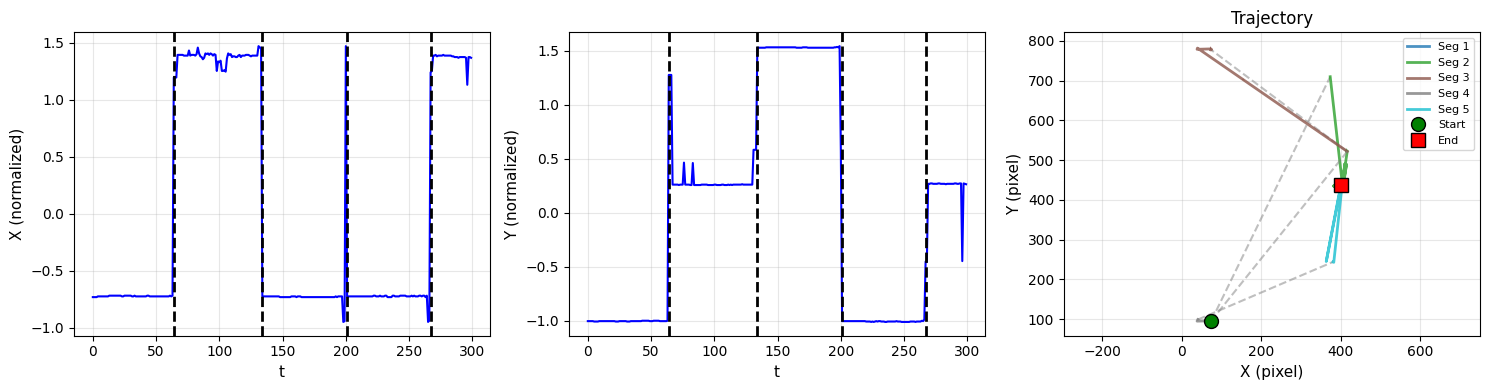

bkps: [np.int32(42), np.int32(67), np.int32(133), np.int32(201), np.int32(268), 300]


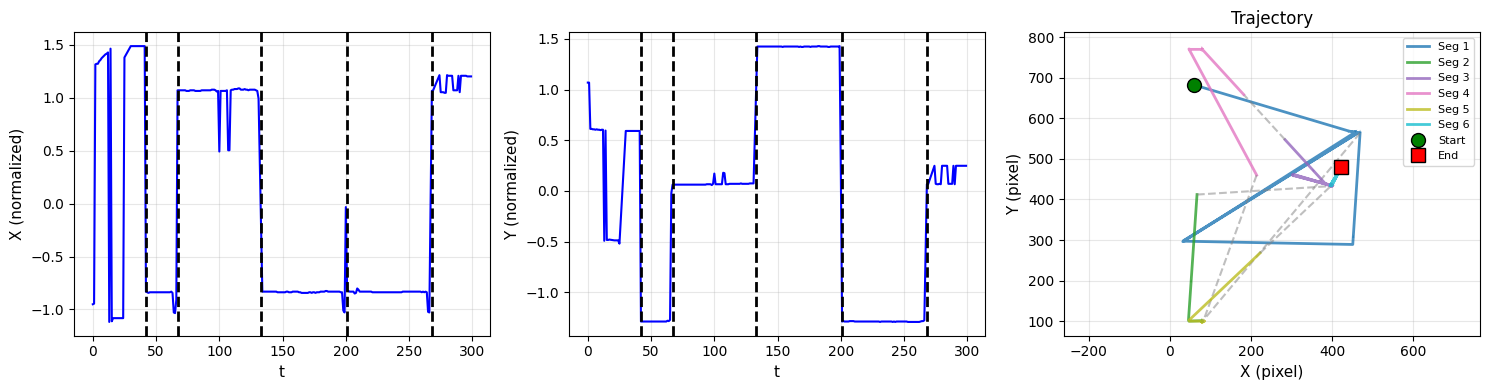

bkps: [np.int32(67), np.int32(133), np.int32(201), np.int32(268), 300]


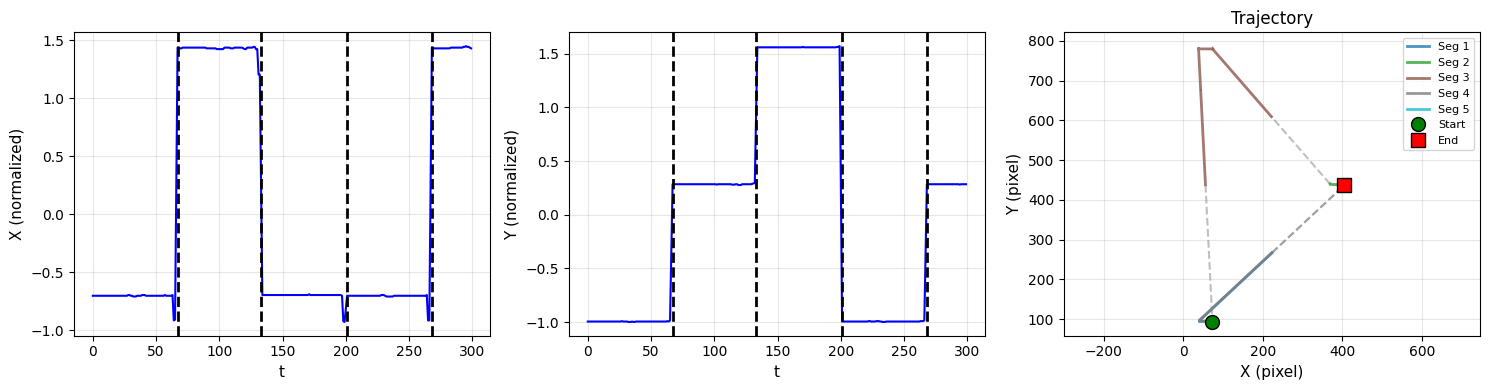

In [ ]:
def find_2d_data_bkps(X: np.array):
    X_clean = [point if point is not None else (np.nan, np.nan) for point in X]    
    X = np.array(X_clean, dtype=float)
    X = pd.DataFrame(X).interpolate("linear").bfill().ffill().to_numpy()

    X_std = StandardScaler().fit_transform(X)

    algo = rpt.KernelCPD(kernel="rbf", jump=1).fit(X_std)
    bkps = algo.predict(pen=10)        
    print("bkps:", bkps)
    
    # Create figure: all in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    
    # Plot time series
    t = np.arange(len(X_std))
    ax1.plot(t, X_std[:, 0], 'b-', linewidth=1.5)
    ax2.plot(t, X_std[:, 1], 'b-', linewidth=1.5)
    
    # Mark change points
    for bkp in bkps[:-1]:
        ax1.axvline(x=bkp, color='black', linestyle='--', linewidth=2)
        ax2.axvline(x=bkp, color='black', linestyle='--', linewidth=2)
    
    ax1.set_xlabel('t', fontsize=11)
    ax1.set_ylabel('X (normalized)', fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    ax2.set_xlabel('t', fontsize=11)
    ax2.set_ylabel('Y (normalized)', fontsize=11)
    ax2.grid(True, alpha=0.3)
    
    # Trajectory plot - continuous line with different colors per segment
    colors = plt.cm.tab10(np.linspace(0, 1, len(bkps)))
    start = 0
    for i, (end, color) in enumerate(zip(bkps, colors)):
        # Draw segment with solid line
        segment = X[start:end]
        ax3.plot(segment[:, 0], segment[:, 1], '-', color=color, 
                linewidth=2, alpha=0.8, label=f'Seg {i+1}')
        
        # Add arrows to show direction
        # Add arrows at multiple points along the segment
        num_arrows = min(3, len(segment) // 5)  # Add up to 3 arrows per segment
        if num_arrows > 0:
            arrow_indices = np.linspace(len(segment)//4, len(segment)-2, num_arrows, dtype=int)
            for idx in arrow_indices:
                if idx < len(segment) - 1:
                    dx = segment[idx+1, 0] - segment[idx, 0]
                    dy = segment[idx+1, 1] - segment[idx, 1]
                    ax3.arrow(segment[idx, 0], segment[idx, 1], dx*0.3, dy*0.3,
                            head_width=5, head_length=8, fc=color, ec=color, 
                            alpha=0.7, linewidth=0)
        
        # Connect to next segment with dashed line (jump)
        if end < len(X):
            ax3.plot([X[end-1, 0], X[end, 0]], 
                    [X[end-1, 1], X[end, 1]], 
                    '--', color='gray', linewidth=1.5, alpha=0.5)
        start = end
    
    # Mark start and end
    ax3.plot(X[0, 0], X[0, 1], 'go', markersize=10, label='Start', 
            markeredgecolor='black', markeredgewidth=1, zorder=5)
    ax3.plot(X[-1, 0], X[-1, 1], 'rs', markersize=10, label='End',
            markeredgecolor='black', markeredgewidth=1, zorder=5)
    
    ax3.set_xlabel('X (pixel)', fontsize=11)
    ax3.set_ylabel('Y (pixel)', fontsize=11)
    ax3.set_title('Trajectory', fontsize=12)
    ax3.legend(fontsize=8)
    ax3.grid(True, alpha=0.3)
    ax3.axis('equal')
    
    plt.tight_layout()
    plt.show()

for box_c in bbox_centers:
    find_2d_data_bkps(box_c)